<a href="https://colab.research.google.com/github/stef4e/CryptoPricePrediction/blob/main/7%20Crypto%20Currencies%20Price%20Prediction%20Using%20Polynominal%20Regression%2C%20XGBoost%20and%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import r2_score

In [3]:
scaler = StandardScaler()

In [4]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [5]:
bitcoin=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/BTC-USD.csv")

In [6]:
bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,10038.421875,10437.411133,9675.316406,10311.545898,10311.545898,22899115082
1,2019-08-16,10319.419922,10524.349609,9855.478516,10374.338867,10374.338867,20228207096
2,2019-08-17,10358.722656,10452.625000,10086.698242,10231.744141,10231.744141,13778035685
3,2019-08-18,10233.005859,10487.070313,10119.094727,10345.810547,10345.810547,12999813869
4,2019-08-19,10350.283203,10916.053711,10313.204102,10916.053711,10916.053711,16038264603
...,...,...,...,...,...,...,...
1457,2023-08-11,29424.902344,29517.773438,29253.517578,29397.714844,29397.714844,10195168197
1458,2023-08-12,29399.787109,29465.113281,29357.587891,29415.964844,29415.964844,6194358008
1459,2023-08-13,29416.593750,29441.433594,29265.806641,29282.914063,29282.914063,7329897180
1460,2023-08-14,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304


In [7]:
litecoin=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/LTC-USD.csv")

In [8]:
litecoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,76.133270,78.507706,72.997780,76.388977,76.388977,3654075558
1,2019-08-16,76.315247,77.169769,73.068527,74.920151,74.920151,3016089036
2,2019-08-17,74.905090,75.330658,72.269691,72.797722,72.797722,2482385549
3,2019-08-18,72.839600,77.558281,71.669083,76.269951,76.269951,2743241606
4,2019-08-19,76.337112,78.508026,75.881348,77.263191,77.263191,2346796021
...,...,...,...,...,...,...,...
1457,2023-08-11,83.034775,83.527885,82.719955,83.495865,83.495865,210777034
1458,2023-08-12,83.494972,83.857224,83.344505,83.448524,83.448524,187648883
1459,2023-08-13,83.450485,83.615974,81.651932,81.978035,81.978035,268437601
1460,2023-08-14,81.979042,82.973045,81.669762,82.068581,82.068581,262059229


In [9]:
dogecoin=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/DOGE-USD.csv")

In [10]:
dogecoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,0.002720,0.002753,0.002584,0.002640,0.002640,32124644
1,2019-08-16,0.002641,0.002714,0.002561,0.002681,0.002681,19795789
2,2019-08-17,0.002684,0.002690,0.002619,0.002646,0.002646,18747565
3,2019-08-18,0.002647,0.002730,0.002622,0.002723,0.002723,20832602
4,2019-08-19,0.002723,0.002827,0.002716,0.002797,0.002797,20301072
...,...,...,...,...,...,...,...
1457,2023-08-11,0.075805,0.075983,0.075167,0.075666,0.075666,222363416
1458,2023-08-12,0.075671,0.077150,0.075602,0.076742,0.076742,301476614
1459,2023-08-13,0.076733,0.076789,0.074473,0.074783,0.074783,271947904
1460,2023-08-14,0.074781,0.076414,0.073952,0.074731,0.074731,347333620


In [11]:
ethereum=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/ETH-USD.csv")

In [12]:
ethereum

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,186.683502,189.462158,178.142563,188.502060,188.502060,8197244441
1,2019-08-16,188.644257,188.905594,180.384842,185.440079,185.440079,7133915837
2,2019-08-17,185.531662,186.703140,182.593887,185.687683,185.687683,5512696513
3,2019-08-18,185.841095,197.522491,183.692245,194.493530,194.493530,5969012024
4,2019-08-19,194.556030,203.560150,193.108246,203.091934,203.091934,6145148692
...,...,...,...,...,...,...,...
1457,2023-08-11,1850.741699,1855.066040,1839.569214,1847.124390,1847.124390,3353025102
1458,2023-08-12,1847.171997,1852.281006,1845.719238,1848.889893,1848.889893,2291124840
1459,2023-08-13,1849.053833,1859.916382,1834.804321,1839.280151,1839.280151,3054625661
1460,2023-08-14,1839.323486,1853.836304,1834.800415,1844.185791,1844.185791,4083364724


In [13]:
cardano=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/ADA-USD.csv")

In [14]:
cardano

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,0.047090,0.048017,0.045497,0.047519,0.047519,43373583
1,2019-08-16,0.047536,0.047536,0.044860,0.046841,0.046841,44228391
2,2019-08-17,0.046869,0.048045,0.046338,0.047393,0.047393,34826995
3,2019-08-18,0.047424,0.051209,0.047047,0.050731,0.050731,38253395
4,2019-08-19,0.050725,0.050813,0.049686,0.050298,0.050298,32307052
...,...,...,...,...,...,...,...
1457,2023-08-11,0.296147,0.297167,0.292524,0.293450,0.293450,134863796
1458,2023-08-12,0.293448,0.294329,0.291076,0.291837,0.291837,116090863
1459,2023-08-13,0.291834,0.293197,0.287777,0.289531,0.289531,138807073
1460,2023-08-14,0.289529,0.292074,0.287816,0.290611,0.290611,136047668


In [15]:
monero=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/XMR-USD.csv")

In [16]:
monero

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,78.579536,82.777321,74.596100,82.526733,82.526733,82268894
1,2019-08-16,82.517708,83.517471,78.328087,82.498695,82.498695,69374820
2,2019-08-17,82.556580,83.696442,81.043579,81.988892,81.988892,69658778
3,2019-08-18,81.997993,88.069748,81.671745,88.024773,88.024773,80774014
4,2019-08-19,88.070236,90.658318,84.779030,90.153481,90.153481,80391798
...,...,...,...,...,...,...,...
1457,2023-08-11,155.987030,157.886246,155.865845,156.793015,156.793015,81873242
1458,2023-08-12,156.789063,158.039993,156.575363,157.723282,157.723282,75281080
1459,2023-08-13,157.750397,159.563324,157.101898,158.227722,158.227722,75273703
1460,2023-08-14,158.229507,159.780930,158.003448,158.308792,158.308792,91093263


In [17]:
dash=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CSV Files/DASH-USD.csv")

In [18]:
dash

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-15,95.618362,96.924858,92.351349,95.183662,95.183662,203677926
1,2019-08-16,95.220963,95.536400,92.065369,94.238167,94.238167,153973787
2,2019-08-17,94.228180,94.400208,91.307892,92.736610,92.736610,126384743
3,2019-08-18,92.749168,96.626320,91.761375,95.108253,95.108253,130360202
4,2019-08-19,95.133324,98.113785,94.272614,98.113785,98.113785,138241467
...,...,...,...,...,...,...,...
1457,2023-08-11,32.348362,32.822819,32.211700,32.504082,32.504082,33642195
1458,2023-08-12,32.503788,32.552181,32.132256,32.280045,32.280045,37299826
1459,2023-08-13,32.281303,32.377693,31.891104,32.015472,32.015472,44422905
1460,2023-08-14,32.014061,32.294449,31.827599,31.960718,31.960718,50397833


1. **Bitcoin**


In [19]:
print('Null Values:', bitcoin.isnull().values.sum())

Null Values: 0


In [20]:
print('NA values:', bitcoin.isnull().values.any())

NA values: False


In [21]:
figure = px.line(bitcoin, x=bitcoin.Date, y=bitcoin.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Bitcoin Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [22]:
bitcoin.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [23]:
bitcoin

,Open,High,Low,Close
0,10038.421875,10437.411133,9675.316406,10311.545898
1,10319.419922,10524.349609,9855.478516,10374.338867
2,10358.722656,10452.625000,10086.698242,10231.744141
3,10233.005859,10487.070313,10119.094727,10345.810547
4,10350.283203,10916.053711,10313.204102,10916.053711
...,...,...,...,...
1457,29424.902344,29517.773438,29253.517578,29397.714844
1458,29399.787109,29465.113281,29357.587891,29415.964844
1459,29416.593750,29441.433594,29265.806641,29282.914063
1460,29283.263672,29660.253906,29124.105469,29408.443359


1.1 **Bitcoin Close Price Prediction using Polynominal Regression**

In [24]:
close=bitcoin["Close"]
bitcoin_copy=bitcoin.copy()
bitcoin_copy.drop(["Close"], axis=1, inplace=True)

In [25]:
close=close.values.reshape(-1, 1)
close

array([[10311.545898],
       [10374.338867],
       [10231.744141],
       ...,
       [29282.914063],
       [29408.443359],
       [29355.896484]])

In [26]:
bitcoin_copy

,Open,High,Low
0,10038.421875,10437.411133,9675.316406
1,10319.419922,10524.349609,9855.478516
2,10358.722656,10452.625000,10086.698242
3,10233.005859,10487.070313,10119.094727
4,10350.283203,10916.053711,10313.204102
...,...,...,...
1457,29424.902344,29517.773438,29253.517578
1458,29399.787109,29465.113281,29357.587891
1459,29416.593750,29441.433594,29265.806641
1460,29283.263672,29660.253906,29124.105469


In [27]:
bitcoin_copy=scaler.fit_transform(bitcoin_copy)
close=scaler.fit_transform(close)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(bitcoin_copy, close, test_size=0.2)

In [29]:
polynominal_regression = PolynomialFeatures(5)

In [30]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [31]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [32]:
Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9993098916967433
R2 score for the testing dataset:  0.9988207412300827
  
MSE for the training dataset:  0.0006842574724650565
MSE for the testing dataset:  0.0012184050253223274


1.2 **Bitcoin Close Price Prediction using XGBoost**

In [33]:
bitcoin

,Open,High,Low,Close
0,10038.421875,10437.411133,9675.316406,10311.545898
1,10319.419922,10524.349609,9855.478516,10374.338867
2,10358.722656,10452.625000,10086.698242,10231.744141
3,10233.005859,10487.070313,10119.094727,10345.810547
4,10350.283203,10916.053711,10313.204102,10916.053711
...,...,...,...,...
1457,29424.902344,29517.773438,29253.517578,29397.714844
1458,29399.787109,29465.113281,29357.587891,29415.964844
1459,29416.593750,29441.433594,29265.806641,29282.914063
1460,29283.263672,29660.253906,29124.105469,29408.443359


In [34]:
close=bitcoin["Close"]
bitcoin_copy=bitcoin.copy()
bitcoin_copy.drop(["Close"], axis=1, inplace=True)

In [35]:
bitcoin_copy

,Open,High,Low
0,10038.421875,10437.411133,9675.316406
1,10319.419922,10524.349609,9855.478516
2,10358.722656,10452.625000,10086.698242
3,10233.005859,10487.070313,10119.094727
4,10350.283203,10916.053711,10313.204102
...,...,...,...
1457,29424.902344,29517.773438,29253.517578
1458,29399.787109,29465.113281,29357.587891
1459,29416.593750,29441.433594,29265.806641
1460,29283.263672,29660.253906,29124.105469


In [36]:
X_train, X_test, Y_train, Y_test= train_test_split(bitcoin_copy, close, test_size=0.20)

In [37]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [38]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

[09:21:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

Mean Absolute Error:  9384.984555863643
Mean Squared Error:  122099565.28774306
Root Mean Squared Error:  11049.867206792263


1.3 **Bitcoin Close Price Prediction using LSTM**

In [40]:
bitcoin

,Open,High,Low,Close
0,10038.421875,10437.411133,9675.316406,10311.545898
1,10319.419922,10524.349609,9855.478516,10374.338867
2,10358.722656,10452.625000,10086.698242,10231.744141
3,10233.005859,10487.070313,10119.094727,10345.810547
4,10350.283203,10916.053711,10313.204102,10916.053711
...,...,...,...,...
1457,29424.902344,29517.773438,29253.517578,29397.714844
1458,29399.787109,29465.113281,29357.587891,29415.964844
1459,29416.593750,29441.433594,29265.806641,29282.914063
1460,29283.263672,29660.253906,29124.105469,29408.443359


In [41]:
matrix = []
for i in range(len(bitcoin['Close'])-1, 2, -1):

  day3=bitcoin['Close'][i-3]
  day2=bitcoin['Close'][i-2]
  day1=bitcoin['Close'][i-1]
  matrix.append([bitcoin['Close'][i], day1, day2, day3])

matrix

[[29355.896484, 29408.443359, 29282.914063, 29415.964844],
 [29408.443359, 29282.914063, 29415.964844, 29397.714844],
 [29282.914063, 29415.964844, 29397.714844, 29429.591797],
 [29415.964844, 29397.714844, 29429.591797, 29561.494141],
 [29397.714844, 29429.591797, 29561.494141, 29765.492188],
 [29429.591797, 29561.494141, 29765.492188, 29180.578125],
 [29561.494141, 29765.492188, 29180.578125, 29041.855469],
 [29765.492188, 29180.578125, 29041.855469, 29042.126953],
 [29180.578125, 29041.855469, 29042.126953, 29074.091797],
 [29041.855469, 29042.126953, 29074.091797, 29178.679688],
 [29042.126953, 29074.091797, 29178.679688, 29151.958984],
 [29074.091797, 29178.679688, 29151.958984, 29675.732422],
 [29178.679688, 29151.958984, 29675.732422, 29230.111328],
 [29151.958984, 29675.732422, 29230.111328, 29275.308594],
 [29675.732422, 29230.111328, 29275.308594, 29356.917969],
 [29230.111328, 29275.308594, 29356.917969, 29319.246094],
 [29275.308594, 29356.917969, 29319.246094, 29210.689453

In [42]:
bitcoin_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
bitcoin_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,29355.896484,29408.443359,29282.914063,29415.964844
1,29408.443359,29282.914063,29415.964844,29397.714844
2,29282.914063,29415.964844,29397.714844,29429.591797
3,29415.964844,29397.714844,29429.591797,29561.494141
4,29397.714844,29429.591797,29561.494141,29765.492188
...,...,...,...,...
1454,10131.055664,10138.049805,10763.232422,10916.053711
1455,10138.049805,10763.232422,10916.053711,10345.810547
1456,10763.232422,10916.053711,10345.810547,10231.744141
1457,10916.053711,10345.810547,10231.744141,10374.338867


In [43]:
test = bitcoin_price_prediction[:int(len(bitcoin_price_prediction)*0.2)]
train = bitcoin_price_prediction[int(len(bitcoin_price_prediction)*0.2):]

In [44]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [45]:
X_train

,One day ago,Two days ago,Three days ago
291,20285.835938,20770.441406,20095.857422
292,20770.441406,20095.857422,19345.572266
293,20095.857422,19345.572266,19567.007813
294,19345.572266,19567.007813,19208.189453
295,19567.007813,19208.189453,19172.468750
...,...,...,...
1454,10138.049805,10763.232422,10916.053711
1455,10763.232422,10916.053711,10345.810547
1456,10916.053711,10345.810547,10231.744141
1457,10345.810547,10231.744141,10374.338867


In [46]:
Y_train

291     20595.351563
292     20285.835938
293     20770.441406
294     20095.857422
295     19345.572266
            ...     
1454    10131.055664
1455    10138.049805
1456    10763.232422
1457    10916.053711
1458    10345.810547
Name: Close, Length: 1168, dtype: float64

In [47]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(1168, 3)

In [49]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [50]:
X_train.shape

(1168, 1, 3)

In [51]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            41600     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [54]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 10s 52ms/step - loss: 1295460224.0000 - mean_absolute_error: 31862.1074 - val_loss: 72938968.0000 - val_mean_absolute_error: 8439.4668
Epoch 2/300
30/30 [==============================] - 1s 21ms/step - loss: 1295450624.0000 - mean_absolute_error: 31861.9688 - val_loss: 72935696.0000 - val_mean_absolute_error: 8439.2715
Epoch 3/300
30/30 [==============================] - 1s 21ms/step - loss: 1295418240.0000 - mean_absolute_error: 31861.5410 - val_loss: 72925960.0000 - val_mean_absolute_error: 8438.6895
Epoch 4/300
30/30 [==============================] - 1s 22ms/step - loss: 1295296768.0000 - mean_absolute_error: 31860.0566 - val_loss: 72894520.0000 - val_mean_absolute_error: 8436.7979
Epoch 5/300
30/30 [==============================] - 1s 18ms/step - loss: 1294913152.0000 - mean_absolute_error: 31855.4570 - val_loss: 72800080.0000 - val_mean_absolute_error: 8431.1113
Epoch 6/300
30/30 [==============================] - 0s 12ms/ste

<Figure size 640x480 with 0 Axes>

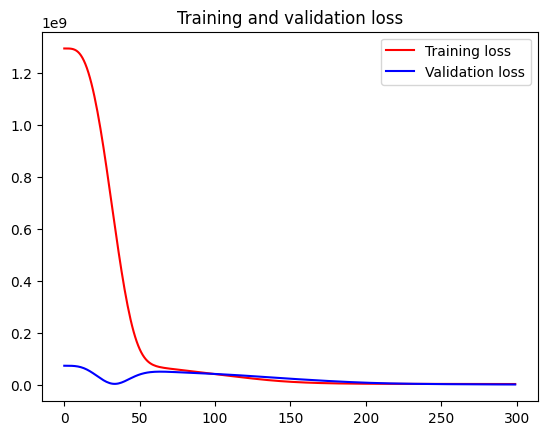

<Figure size 640x480 with 0 Axes>

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [56]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [57]:
r2_score(Y_test,Y_pred)

0.9784218387132447

In [58]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  497.28146141043817
-------------------------------------------------------------------------------------
Mean Square Error:  524334.753871669


2. **Litecoin**

In [59]:
print('Null Values:', litecoin.isnull().values.sum())

Null Values: 0


In [60]:
print('NA values:', litecoin.isnull().values.any())

NA values: False


In [61]:
figure = px.line(litecoin, x=litecoin.Date, y=litecoin.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Litecoin Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [62]:
litecoin.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [63]:
litecoin

,Open,High,Low,Close
0,76.133270,78.507706,72.997780,76.388977
1,76.315247,77.169769,73.068527,74.920151
2,74.905090,75.330658,72.269691,72.797722
3,72.839600,77.558281,71.669083,76.269951
4,76.337112,78.508026,75.881348,77.263191
...,...,...,...,...
1457,83.034775,83.527885,82.719955,83.495865
1458,83.494972,83.857224,83.344505,83.448524
1459,83.450485,83.615974,81.651932,81.978035
1460,81.979042,82.973045,81.669762,82.068581


2.1 **Litecoin Close Price Prediction using Polynominal Regression**

In [64]:
close=litecoin["Close"]
litecoin_copy=litecoin.copy()
litecoin_copy.drop(["Close"], axis=1, inplace=True)

In [65]:
close=close.values.reshape(-1, 1)
close

array([[76.388977],
       [74.920151],
       [72.797722],
       ...,
       [81.978035],
       [82.068581],
       [81.720856]])

In [66]:
litecoin_copy

,Open,High,Low
0,76.133270,78.507706,72.997780
1,76.315247,77.169769,73.068527
2,74.905090,75.330658,72.269691
3,72.839600,77.558281,71.669083
4,76.337112,78.508026,75.881348
...,...,...,...
1457,83.034775,83.527885,82.719955
1458,83.494972,83.857224,83.344505
1459,83.450485,83.615974,81.651932
1460,81.979042,82.973045,81.669762


In [67]:
litecoin_copy=scaler.fit_transform(litecoin_copy)
close=scaler.fit_transform(close)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(litecoin_copy, close, test_size=0.2)

In [69]:
polynominal_regression = PolynomialFeatures(5)

In [70]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [71]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

In [72]:
Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9985767935715019
R2 score for the testing dataset:  0.40788942895736124
  
MSE for the training dataset:  0.0013921402252618455
MSE for the testing dataset:  0.6433486175531362


2.2 **Litecoin Close Price Prediction using XGBoost**

In [73]:
litecoin

,Open,High,Low,Close
0,76.133270,78.507706,72.997780,76.388977
1,76.315247,77.169769,73.068527,74.920151
2,74.905090,75.330658,72.269691,72.797722
3,72.839600,77.558281,71.669083,76.269951
4,76.337112,78.508026,75.881348,77.263191
...,...,...,...,...
1457,83.034775,83.527885,82.719955,83.495865
1458,83.494972,83.857224,83.344505,83.448524
1459,83.450485,83.615974,81.651932,81.978035
1460,81.979042,82.973045,81.669762,82.068581


In [74]:
close=litecoin["Close"]
litecoin_copy=litecoin.copy()
litecoin_copy.drop(["Close"], axis=1, inplace=True)

In [75]:
litecoin_copy

,Open,High,Low
0,76.133270,78.507706,72.997780
1,76.315247,77.169769,73.068527
2,74.905090,75.330658,72.269691
3,72.839600,77.558281,71.669083
4,76.337112,78.508026,75.881348
...,...,...,...
1457,83.034775,83.527885,82.719955
1458,83.494972,83.857224,83.344505
1459,83.450485,83.615974,81.651932
1460,81.979042,82.973045,81.669762


In [76]:
X_train, X_test, Y_train, Y_test= train_test_split(litecoin_copy, close, test_size=0.20)

In [77]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [78]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

[09:24:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [79]:
Y_pred = model.predict(X_test)

In [80]:
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

Mean Absolute Error:  36.5529999979473
Mean Squared Error:  1827.5840737349959
Root Mean Squared Error:  42.75025232364127


2.3 **Litecoin Close Price Prediction using LSTM**

In [81]:
litecoin

,Open,High,Low,Close
0,76.133270,78.507706,72.997780,76.388977
1,76.315247,77.169769,73.068527,74.920151
2,74.905090,75.330658,72.269691,72.797722
3,72.839600,77.558281,71.669083,76.269951
4,76.337112,78.508026,75.881348,77.263191
...,...,...,...,...
1457,83.034775,83.527885,82.719955,83.495865
1458,83.494972,83.857224,83.344505,83.448524
1459,83.450485,83.615974,81.651932,81.978035
1460,81.979042,82.973045,81.669762,82.068581


In [82]:
matrix = []
for i in range(len(litecoin['Close'])-1, 2, -1):

  day3=litecoin['Close'][i-3]
  day2=litecoin['Close'][i-2]
  day1=litecoin['Close'][i-1]
  matrix.append([litecoin['Close'][i], day1, day2, day3])

matrix

[[81.720856, 82.068581, 81.978035, 83.448524],
 [82.068581, 81.978035, 83.448524, 83.495865],
 [81.978035, 83.448524, 83.495865, 83.03347],
 [83.448524, 83.495865, 83.03347, 84.037209],
 [83.495865, 83.03347, 84.037209, 83.956894],
 [83.03347, 84.037209, 83.956894, 82.344521],
 [84.037209, 83.956894, 82.344521, 82.471703],
 [83.956894, 82.344521, 82.471703, 83.105591],
 [82.344521, 82.471703, 83.105591, 82.078911],
 [82.471703, 83.105591, 82.078911, 82.707794],
 [83.105591, 82.078911, 82.707794, 87.489059],
 [82.078911, 82.707794, 87.489059, 93.820404],
 [82.707794, 87.489059, 93.820404, 92.243134],
 [87.489059, 93.820404, 92.243134, 94.091057],
 [93.820404, 92.243134, 94.091057, 94.598091],
 [92.243134, 94.091057, 94.598091, 91.530571],
 [94.091057, 94.598091, 91.530571, 90.493767],
 [94.598091, 91.530571, 90.493767, 90.621422],
 [91.530571, 90.493767, 90.621422, 89.531403],
 [90.493767, 90.621422, 89.531403, 89.153465],
 [90.621422, 89.531403, 89.153465, 93.258865],
 [89.531403, 89.1

In [83]:
litecoin_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
litecoin_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,81.720856,82.068581,81.978035,83.448524
1,82.068581,81.978035,83.448524,83.495865
2,81.978035,83.448524,83.495865,83.033470
3,83.448524,83.495865,83.033470,84.037209
4,83.495865,83.033470,84.037209,83.956894
...,...,...,...,...
1454,73.598595,72.964951,75.196564,77.263191
1455,72.964951,75.196564,77.263191,76.269951
1456,75.196564,77.263191,76.269951,72.797722
1457,77.263191,76.269951,72.797722,74.920151


In [84]:
test = litecoin_price_prediction[:int(len(litecoin_price_prediction)*0.2)]
train = litecoin_price_prediction[int(len(litecoin_price_prediction)*0.2):]

In [85]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [86]:
X_train

,One day ago,Two days ago,Three days ago
291,54.807610,56.391678,56.025154
292,56.391678,56.025154,52.569244
293,56.025154,52.569244,53.950367
294,52.569244,53.950367,52.180172
295,53.950367,52.180172,51.623371
...,...,...,...
1454,72.964951,75.196564,77.263191
1455,75.196564,77.263191,76.269951
1456,77.263191,76.269951,72.797722
1457,76.269951,72.797722,74.920151


In [87]:
Y_train

291     55.003899
292     54.807610
293     56.391678
294     56.025154
295     52.569244
          ...    
1454    73.598595
1455    72.964951
1456    75.196564
1457    77.263191
1458    76.269951
Name: Close, Length: 1168, dtype: float64

In [88]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
X_train.shape

(1168, 3)

In [90]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [91]:
X_train.shape

(1168, 1, 3)

In [92]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [95]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 4s 23ms/step - loss: 17939.2402 - mean_absolute_error: 115.4705 - val_loss: 3315.0481 - val_mean_absolute_error: 56.2323
Epoch 2/300
30/30 [==============================] - 0s 12ms/step - loss: 17903.7539 - mean_absolute_error: 115.3208 - val_loss: 3288.3491 - val_mean_absolute_error: 55.9860
Epoch 3/300
30/30 [==============================] - 0s 11ms/step - loss: 17804.7168 - mean_absolute_error: 114.8993 - val_loss: 3204.5627 - val_mean_absolute_error: 55.1910
Epoch 4/300
30/30 [==============================] - 0s 11ms/step - loss: 17487.0176 - mean_absolute_error: 113.5220 - val_loss: 2929.1670 - val_mean_absolute_error: 52.4308
Epoch 5/300
30/30 [==============================] - 0s 11ms/step - loss: 16584.3203 - mean_absolute_error: 109.3210 - val_loss: 2216.7456 - val_mean_absolute_error: 44.2749
Epoch 6/300
30/30 [==============================] - 0s 10ms/step - loss: 14696.1475 - mean_absolute_error: 99.6021 - val_loss: 12

<Figure size 640x480 with 0 Axes>

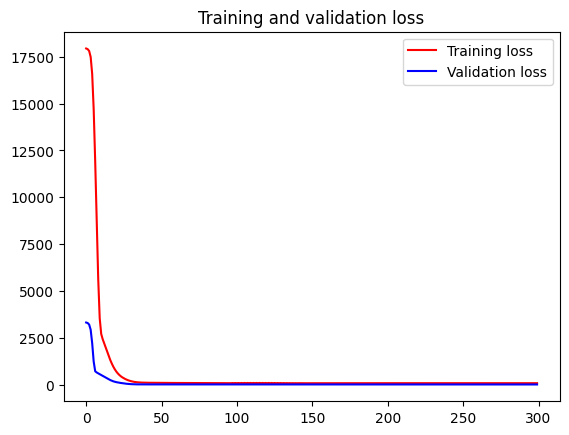

<Figure size 640x480 with 0 Axes>

In [96]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [97]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [98]:
r2_score(Y_test,Y_pred)

0.9077997630373342

In [99]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  2.384104046356516
-------------------------------------------------------------------------------------
Mean Square Error:  12.115694541031402


3. **Dogecoin**

In [100]:
print('Null Values:', dogecoin.isnull().values.sum())

Null Values: 0


In [101]:
print('NA values:', dogecoin.isnull().values.any())

NA values: False


In [102]:
figure = px.line(dogecoin, x=dogecoin.Date, y=dogecoin.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Dogecoin Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [103]:
dogecoin.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [104]:
dogecoin

,Open,High,Low,Close
0,0.002720,0.002753,0.002584,0.002640
1,0.002641,0.002714,0.002561,0.002681
2,0.002684,0.002690,0.002619,0.002646
3,0.002647,0.002730,0.002622,0.002723
4,0.002723,0.002827,0.002716,0.002797
...,...,...,...,...
1457,0.075805,0.075983,0.075167,0.075666
1458,0.075671,0.077150,0.075602,0.076742
1459,0.076733,0.076789,0.074473,0.074783
1460,0.074781,0.076414,0.073952,0.074731


3.1 **Dogecoin Close Price Prediction using Polynominal Regression**

In [105]:
close=dogecoin["Close"]
dogecoin_copy=dogecoin.copy()
dogecoin_copy.drop(["Close"], axis=1, inplace=True)

In [106]:
close=close.values.reshape(-1, 1)
close

array([[0.00264 ],
       [0.002681],
       [0.002646],
       ...,
       [0.074783],
       [0.074731],
       [0.074059]])

In [107]:
dogecoin_copy

,Open,High,Low
0,0.002720,0.002753,0.002584
1,0.002641,0.002714,0.002561
2,0.002684,0.002690,0.002619
3,0.002647,0.002730,0.002622
4,0.002723,0.002827,0.002716
...,...,...,...
1457,0.075805,0.075983,0.075167
1458,0.075671,0.077150,0.075602
1459,0.076733,0.076789,0.074473
1460,0.074781,0.076414,0.073952


In [108]:
dogecoin_copy=scaler.fit_transform(dogecoin_copy)
close=scaler.fit_transform(close)

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(dogecoin_copy, close, test_size=0.2)

In [110]:
polynominal_regression = PolynomialFeatures(5)

In [111]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [112]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [113]:
Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9994968349659352
R2 score for the testing dataset:  -2.600075740823004
  
MSE for the training dataset:  0.0005022372723264938
MSE for the testing dataset:  3.623696081940596


3.2 **Dogecoin Close Price Prediction using XGBoost**

In [114]:
dogecoin

,Open,High,Low,Close
0,0.002720,0.002753,0.002584,0.002640
1,0.002641,0.002714,0.002561,0.002681
2,0.002684,0.002690,0.002619,0.002646
3,0.002647,0.002730,0.002622,0.002723
4,0.002723,0.002827,0.002716,0.002797
...,...,...,...,...
1457,0.075805,0.075983,0.075167,0.075666
1458,0.075671,0.077150,0.075602,0.076742
1459,0.076733,0.076789,0.074473,0.074783
1460,0.074781,0.076414,0.073952,0.074731


In [115]:
close=dogecoin["Close"]
dogecoin_copy=dogecoin.copy()
dogecoin_copy.drop(["Close"], axis=1, inplace=True)

In [116]:
dogecoin_copy

,Open,High,Low
0,0.002720,0.002753,0.002584
1,0.002641,0.002714,0.002561
2,0.002684,0.002690,0.002619
3,0.002647,0.002730,0.002622
4,0.002723,0.002827,0.002716
...,...,...,...
1457,0.075805,0.075983,0.075167
1458,0.075671,0.077150,0.075602
1459,0.076733,0.076789,0.074473
1460,0.074781,0.076414,0.073952


In [117]:
X_train, X_test, Y_train, Y_test= train_test_split(dogecoin_copy, close, test_size=0.20)

In [118]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [119]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

[09:26:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [120]:
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

Mean Absolute Error:  0.14861268707856382
Mean Squared Error:  0.023644333945243352
Root Mean Squared Error:  0.15376714195576163


3.3 **Dogecoin Close Price Prediction using LSTM**

In [121]:
dogecoin

,Open,High,Low,Close
0,0.002720,0.002753,0.002584,0.002640
1,0.002641,0.002714,0.002561,0.002681
2,0.002684,0.002690,0.002619,0.002646
3,0.002647,0.002730,0.002622,0.002723
4,0.002723,0.002827,0.002716,0.002797
...,...,...,...,...
1457,0.075805,0.075983,0.075167,0.075666
1458,0.075671,0.077150,0.075602,0.076742
1459,0.076733,0.076789,0.074473,0.074783
1460,0.074781,0.076414,0.073952,0.074731


In [122]:
matrix = []
for i in range(len(dogecoin['Close'])-1, 2, -1):

  day3=dogecoin['Close'][i-3]
  day2=dogecoin['Close'][i-2]
  day1=dogecoin['Close'][i-1]
  matrix.append([dogecoin['Close'][i], day1, day2, day3])

matrix

[[0.074059, 0.074731, 0.074783, 0.076742],
 [0.074731, 0.074783, 0.076742, 0.075666],
 [0.074783, 0.076742, 0.075666, 0.075803],
 [0.076742, 0.075666, 0.075803, 0.075314],
 [0.075666, 0.075803, 0.075314, 0.074986],
 [0.075803, 0.075314, 0.074986, 0.073422],
 [0.075314, 0.074986, 0.073422, 0.074266],
 [0.074986, 0.073422, 0.074266, 0.075686],
 [0.073422, 0.074266, 0.075686, 0.073416],
 [0.074266, 0.075686, 0.073416, 0.073615],
 [0.075686, 0.073416, 0.073615, 0.074213],
 [0.073416, 0.073615, 0.074213, 0.078042],
 [0.073615, 0.074213, 0.078042, 0.077818],
 [0.074213, 0.078042, 0.077818, 0.078061],
 [0.078042, 0.077818, 0.078061, 0.080188],
 [0.077818, 0.078061, 0.080188, 0.077321],
 [0.078061, 0.080188, 0.077321, 0.077562],
 [0.080188, 0.077321, 0.077562, 0.077958],
 [0.077321, 0.077562, 0.077958, 0.081845],
 [0.077562, 0.077958, 0.081845, 0.074268],
 [0.077958, 0.081845, 0.074268, 0.071819],
 [0.081845, 0.074268, 0.071819, 0.070433],
 [0.074268, 0.071819, 0.070433, 0.073295],
 [0.071819,

In [123]:
dogecoin_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
dogecoin_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,0.074059,0.074731,0.074783,0.076742
1,0.074731,0.074783,0.076742,0.075666
2,0.074783,0.076742,0.075666,0.075803
3,0.076742,0.075666,0.075803,0.075314
4,0.075666,0.075803,0.075314,0.074986
...,...,...,...,...
1454,0.002700,0.002675,0.002763,0.002797
1455,0.002675,0.002763,0.002797,0.002723
1456,0.002763,0.002797,0.002723,0.002646
1457,0.002797,0.002723,0.002646,0.002681


In [124]:
test = dogecoin_price_prediction[:int(len(dogecoin_price_prediction)*0.2)]
train = dogecoin_price_prediction[int(len(dogecoin_price_prediction)*0.2):]

In [125]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [126]:
X_train

,One day ago,Two days ago,Three days ago
291,0.077018,0.072800,0.062882
292,0.072800,0.062882,0.059506
293,0.062882,0.059506,0.060347
294,0.059506,0.060347,0.059694
295,0.060347,0.059694,0.059334
...,...,...,...
1454,0.002675,0.002763,0.002797
1455,0.002763,0.002797,0.002723
1456,0.002797,0.002723,0.002646
1457,0.002723,0.002646,0.002681


In [127]:
Y_train

291     0.083897
292     0.077018
293     0.072800
294     0.062882
295     0.059506
          ...   
1454    0.002700
1455    0.002675
1456    0.002763
1457    0.002797
1458    0.002723
Name: Close, Length: 1168, dtype: float64

In [128]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [129]:
X_train.shape

(1168, 3)

In [130]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [131]:
X_train.shape

(1168, 1, 3)

In [132]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [133]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_5 (LSTM)               (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [135]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 4s 20ms/step - loss: 0.0186 - mean_absolute_error: 0.1091 - val_loss: 0.0026 - val_mean_absolute_error: 0.0511
Epoch 2/300
30/30 [==============================] - 0s 10ms/step - loss: 0.0052 - mean_absolute_error: 0.0599 - val_loss: 0.0022 - val_mean_absolute_error: 0.0470
Epoch 3/300
30/30 [==============================] - 0s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0208 - val_loss: 2.0269e-04 - val_mean_absolute_error: 0.0142
Epoch 4/300
30/30 [==============================] - 0s 11ms/step - loss: 0.0018 - mean_absolute_error: 0.0342 - val_loss: 2.2495e-04 - val_mean_absolute_error: 0.0150
Epoch 5/300
30/30 [==============================] - 0s 11ms/step - loss: 8.0654e-04 - mean_absolute_error: 0.0152 - val_loss: 7.4586e-06 - val_mean_absolute_error: 0.0027
Epoch 6/300
30/30 [==============================] - 0s 10ms/step - loss: 8.9319e-04 - mean_absolute_error: 0.0200 - val_loss: 1.3052e-05 - val_mean_absolute_error:

<Figure size 640x480 with 0 Axes>

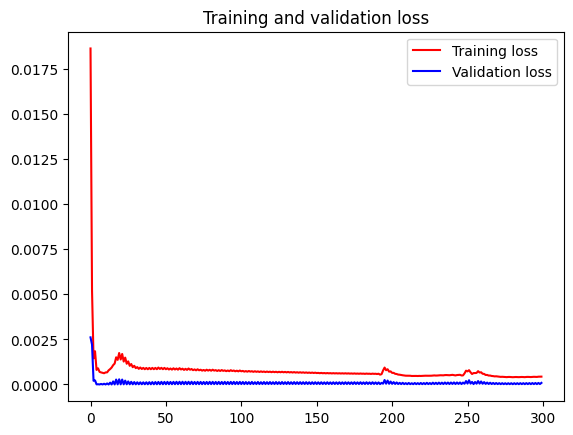

<Figure size 640x480 with 0 Axes>

In [136]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [137]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [138]:
r2_score(Y_test,Y_pred)

-0.30435686805900364

In [139]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  0.01314810837781716
-------------------------------------------------------------------------------------
Mean Square Error:  0.00020309067755939513


4. **Ethereum**

In [140]:
print('Null Values:', ethereum.isnull().values.sum())

Null Values: 0


In [141]:
print('NA values:', ethereum.isnull().values.any())

NA values: False


In [142]:
figure = px.line(ethereum, x=ethereum.Date, y=ethereum.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Ethereum Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [143]:
ethereum.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [144]:
ethereum

,Open,High,Low,Close
0,186.683502,189.462158,178.142563,188.502060
1,188.644257,188.905594,180.384842,185.440079
2,185.531662,186.703140,182.593887,185.687683
3,185.841095,197.522491,183.692245,194.493530
4,194.556030,203.560150,193.108246,203.091934
...,...,...,...,...
1457,1850.741699,1855.066040,1839.569214,1847.124390
1458,1847.171997,1852.281006,1845.719238,1848.889893
1459,1849.053833,1859.916382,1834.804321,1839.280151
1460,1839.323486,1853.836304,1834.800415,1844.185791


4.1 **Ethereum Close Price Prediction using Polynominal Regression**

In [145]:
close=ethereum["Close"]
ethereum_copy=ethereum.copy()
ethereum_copy.drop(["Close"], axis=1, inplace=True)

In [146]:
close=close.values.reshape(-1, 1)
close

array([[ 188.50206 ],
       [ 185.440079],
       [ 185.687683],
       ...,
       [1839.280151],
       [1844.185791],
       [1841.170044]])

In [147]:
ethereum_copy

,Open,High,Low
0,186.683502,189.462158,178.142563
1,188.644257,188.905594,180.384842
2,185.531662,186.703140,182.593887
3,185.841095,197.522491,183.692245
4,194.556030,203.560150,193.108246
...,...,...,...
1457,1850.741699,1855.066040,1839.569214
1458,1847.171997,1852.281006,1845.719238
1459,1849.053833,1859.916382,1834.804321
1460,1839.323486,1853.836304,1834.800415


In [148]:
ethereum_copy=scaler.fit_transform(ethereum_copy)
close=scaler.fit_transform(close)

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(ethereum_copy, close, test_size=0.2)

In [150]:
polynominal_regression = PolynomialFeatures(5)

In [151]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [152]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [153]:
Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9993103422481856
R2 score for the testing dataset:  0.9986736882984674
  
MSE for the training dataset:  0.0006881784656034715
MSE for the testing dataset:  0.001337392090430542


4.2 **Ethereum Close Price Prediction using XGBoost**

In [154]:
ethereum

,Open,High,Low,Close
0,186.683502,189.462158,178.142563,188.502060
1,188.644257,188.905594,180.384842,185.440079
2,185.531662,186.703140,182.593887,185.687683
3,185.841095,197.522491,183.692245,194.493530
4,194.556030,203.560150,193.108246,203.091934
...,...,...,...,...
1457,1850.741699,1855.066040,1839.569214,1847.124390
1458,1847.171997,1852.281006,1845.719238,1848.889893
1459,1849.053833,1859.916382,1834.804321,1839.280151
1460,1839.323486,1853.836304,1834.800415,1844.185791


In [155]:
close=ethereum["Close"]
ethereum_copy=ethereum.copy()
ethereum_copy.drop(["Close"], axis=1, inplace=True)

In [156]:
ethereum_copy

,Open,High,Low
0,186.683502,189.462158,178.142563
1,188.644257,188.905594,180.384842
2,185.531662,186.703140,182.593887
3,185.841095,197.522491,183.692245
4,194.556030,203.560150,193.108246
...,...,...,...
1457,1850.741699,1855.066040,1839.569214
1458,1847.171997,1852.281006,1845.719238
1459,1849.053833,1859.916382,1834.804321
1460,1839.323486,1853.836304,1834.800415


In [157]:
X_train, X_test, Y_train, Y_test= train_test_split(ethereum_copy, close, test_size=0.20)

In [158]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [159]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

[09:28:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [160]:
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

Mean Absolute Error:  561.9380234353669
Mean Squared Error:  512509.44693420123
Root Mean Squared Error:  715.8976511584608


4.3 **Ethereum Close Price Prediction using LSTM**

In [161]:
ethereum

,Open,High,Low,Close
0,186.683502,189.462158,178.142563,188.502060
1,188.644257,188.905594,180.384842,185.440079
2,185.531662,186.703140,182.593887,185.687683
3,185.841095,197.522491,183.692245,194.493530
4,194.556030,203.560150,193.108246,203.091934
...,...,...,...,...
1457,1850.741699,1855.066040,1839.569214,1847.124390
1458,1847.171997,1852.281006,1845.719238,1848.889893
1459,1849.053833,1859.916382,1834.804321,1839.280151
1460,1839.323486,1853.836304,1834.800415,1844.185791


In [162]:
matrix = []
for i in range(len(ethereum['Close'])-1, 2, -1):

  day3=ethereum['Close'][i-3]
  day2=ethereum['Close'][i-2]
  day1=ethereum['Close'][i-1]
  matrix.append([ethereum['Close'][i], day1, day2, day3])

matrix

[[1841.170044, 1844.185791, 1839.280151, 1848.889893],
 [1844.185791, 1839.280151, 1848.889893, 1847.12439],
 [1839.280151, 1848.889893, 1847.12439, 1850.753418],
 [1848.889893, 1847.12439, 1850.753418, 1854.297607],
 [1847.12439, 1850.753418, 1854.297607, 1855.807373],
 [1850.753418, 1854.297607, 1855.807373, 1826.938843],
 [1854.297607, 1855.807373, 1826.938843, 1827.462036],
 [1855.807373, 1826.938843, 1827.462036, 1834.987915],
 [1826.938843, 1827.462036, 1834.987915, 1827.712891],
 [1827.462036, 1834.987915, 1827.712891, 1835.136475],
 [1834.987915, 1827.712891, 1835.136475, 1839.089722],
 [1827.712891, 1835.136475, 1839.089722, 1871.792114],
 [1835.136475, 1839.089722, 1871.792114, 1856.162354],
 [1839.089722, 1871.792114, 1856.162354, 1861.643799],
 [1871.792114, 1856.162354, 1861.643799, 1881.068848],
 [1856.162354, 1861.643799, 1881.068848, 1874.744873],
 [1861.643799, 1881.068848, 1874.744873, 1860.357178],
 [1881.068848, 1874.744873, 1860.357178, 1872.159912],
 [1874.744873,

In [163]:
ethereum_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
ethereum_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,1841.170044,1844.185791,1839.280151,1848.889893
1,1844.185791,1839.280151,1848.889893,1847.124390
2,1839.280151,1848.889893,1847.124390,1850.753418
3,1848.889893,1847.124390,1850.753418,1854.297607
4,1847.124390,1850.753418,1854.297607,1855.807373
...,...,...,...,...
1454,191.332916,186.891632,196.565414,203.091934
1455,186.891632,196.565414,203.091934,194.493530
1456,196.565414,203.091934,194.493530,185.687683
1457,203.091934,194.493530,185.687683,185.440079


In [164]:
test = ethereum_price_prediction[:int(len(ethereum_price_prediction)*0.2)]
train = ethereum_price_prediction[int(len(ethereum_price_prediction)*0.2):]

In [165]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [166]:
X_train

,One day ago,Two days ago,Three days ago
291,1514.374878,1566.566650,1461.665405
292,1566.566650,1461.665405,1344.998535
293,1461.665405,1344.998535,1363.447021
294,1344.998535,1363.447021,1314.299194
295,1363.447021,1314.299194,1299.946411
...,...,...,...
1454,186.891632,196.565414,203.091934
1455,196.565414,203.091934,194.493530
1456,203.091934,194.493530,185.687683
1457,194.493530,185.687683,185.440079


In [167]:
Y_train

291     1555.477905
292     1514.374878
293     1566.566650
294     1461.665405
295     1344.998535
           ...     
1454     191.332916
1455     186.891632
1456     196.565414
1457     203.091934
1458     194.493530
Name: Close, Length: 1168, dtype: float64

In [168]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
X_train.shape

(1168, 3)

In [170]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [171]:
X_train.shape

(1168, 1, 3)

In [172]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [173]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_7 (LSTM)               (None, 64)                42240     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [174]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [175]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 5s 38ms/step - loss: 5129932.5000 - mean_absolute_error: 1875.9469 - val_loss: 32026.4023 - val_mean_absolute_error: 175.2637
Epoch 2/300
30/30 [==============================] - 0s 10ms/step - loss: 5129233.5000 - mean_absolute_error: 1875.7740 - val_loss: 31928.1211 - val_mean_absolute_error: 174.9820
Epoch 3/300
30/30 [==============================] - 0s 10ms/step - loss: 5127075.0000 - mean_absolute_error: 1875.2654 - val_loss: 31608.0410 - val_mean_absolute_error: 174.0595
Epoch 4/300
30/30 [==============================] - 0s 10ms/step - loss: 5119791.0000 - mean_absolute_error: 1873.6274 - val_loss: 30547.2422 - val_mean_absolute_error: 170.9613
Epoch 5/300
30/30 [==============================] - 0s 10ms/step - loss: 5098215.5000 - mean_absolute_error: 1868.8005 - val_loss: 27568.5176 - val_mean_absolute_error: 161.9429
Epoch 6/300
30/30 [==============================] - 0s 11ms/step - loss: 5050899.0000 - mean_absolute_er

<Figure size 640x480 with 0 Axes>

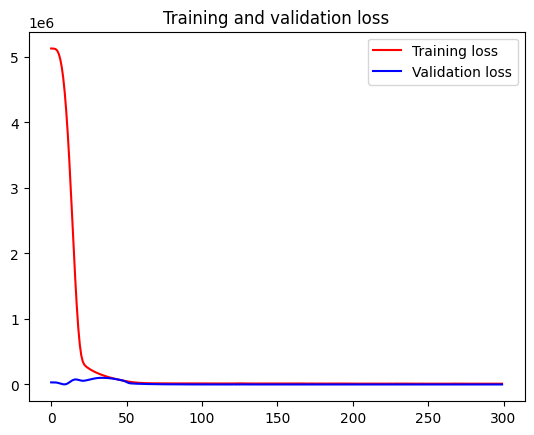

<Figure size 640x480 with 0 Axes>

In [176]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [177]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [178]:
r2_score(Y_test,Y_pred)

0.9643415248772107

In [179]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  32.86091910628758
-------------------------------------------------------------------------------------
Mean Square Error:  2363.105864325733


5. **Cardano**

In [180]:
print('Null Values:', cardano.isnull().values.sum())

Null Values: 0


In [181]:
print('NA values:', cardano.isnull().values.any())

NA values: False


In [182]:
figure = px.line(cardano, x=cardano.Date, y=cardano.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Cardano Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [183]:
cardano.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [184]:
cardano

,Open,High,Low,Close
0,0.047090,0.048017,0.045497,0.047519
1,0.047536,0.047536,0.044860,0.046841
2,0.046869,0.048045,0.046338,0.047393
3,0.047424,0.051209,0.047047,0.050731
4,0.050725,0.050813,0.049686,0.050298
...,...,...,...,...
1457,0.296147,0.297167,0.292524,0.293450
1458,0.293448,0.294329,0.291076,0.291837
1459,0.291834,0.293197,0.287777,0.289531
1460,0.289529,0.292074,0.287816,0.290611


5.1 **Cardano Close Price Prediction using Polynominal Regression**

In [185]:
close=cardano["Close"]
cardano_copy=cardano.copy()
cardano_copy.drop(["Close"], axis=1, inplace=True)

In [186]:
close=close.values.reshape(-1, 1)
close

array([[0.047519],
       [0.046841],
       [0.047393],
       ...,
       [0.289531],
       [0.290611],
       [0.288946]])

In [187]:
cardano_copy

,Open,High,Low
0,0.047090,0.048017,0.045497
1,0.047536,0.047536,0.044860
2,0.046869,0.048045,0.046338
3,0.047424,0.051209,0.047047
4,0.050725,0.050813,0.049686
...,...,...,...
1457,0.296147,0.297167,0.292524
1458,0.293448,0.294329,0.291076
1459,0.291834,0.293197,0.287777
1460,0.289529,0.292074,0.287816


In [188]:
cardano_copy=scaler.fit_transform(cardano_copy)
close=scaler.fit_transform(close)

In [189]:
X_train, X_test, Y_train, Y_test = train_test_split(cardano_copy, close, test_size=0.2)

In [190]:
polynominal_regression = PolynomialFeatures(5)

In [191]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [192]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [193]:
Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9993813870106243
R2 score for the testing dataset:  -906.7353427576746
  
MSE for the training dataset:  0.0005987328276865391
MSE for the testing dataset:  1022.8473586585609


5.2 **Cardano Close Price Prediction using XGBoost**

In [194]:
cardano

,Open,High,Low,Close
0,0.047090,0.048017,0.045497,0.047519
1,0.047536,0.047536,0.044860,0.046841
2,0.046869,0.048045,0.046338,0.047393
3,0.047424,0.051209,0.047047,0.050731
4,0.050725,0.050813,0.049686,0.050298
...,...,...,...,...
1457,0.296147,0.297167,0.292524,0.293450
1458,0.293448,0.294329,0.291076,0.291837
1459,0.291834,0.293197,0.287777,0.289531
1460,0.289529,0.292074,0.287816,0.290611


In [195]:
close=cardano["Close"]
cardano_copy=cardano.copy()
cardano_copy.drop(["Close"], axis=1, inplace=True)

In [196]:
cardano_copy

,Open,High,Low
0,0.047090,0.048017,0.045497
1,0.047536,0.047536,0.044860
2,0.046869,0.048045,0.046338
3,0.047424,0.051209,0.047047
4,0.050725,0.050813,0.049686
...,...,...,...
1457,0.296147,0.297167,0.292524
1458,0.293448,0.294329,0.291076
1459,0.291834,0.293197,0.287777
1460,0.289529,0.292074,0.287816


In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(cardano_copy, close, test_size=0.20)

In [198]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [199]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)


print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

[09:30:35] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error:  0.18009460308381559
Mean Squared Error:  0.06321001811262486
Root Mean Squared Error:  0.25141602596617596


5.3 **Cardano Close Price Prediction using LSTM**

In [200]:
cardano

,Open,High,Low,Close
0,0.047090,0.048017,0.045497,0.047519
1,0.047536,0.047536,0.044860,0.046841
2,0.046869,0.048045,0.046338,0.047393
3,0.047424,0.051209,0.047047,0.050731
4,0.050725,0.050813,0.049686,0.050298
...,...,...,...,...
1457,0.296147,0.297167,0.292524,0.293450
1458,0.293448,0.294329,0.291076,0.291837
1459,0.291834,0.293197,0.287777,0.289531
1460,0.289529,0.292074,0.287816,0.290611


In [201]:
matrix = []
for i in range(len(cardano['Close'])-1, 2, -1):

  day3=cardano['Close'][i-3]
  day2=cardano['Close'][i-2]
  day1=cardano['Close'][i-1]
  matrix.append([cardano['Close'][i], day1, day2, day3])

matrix

[[0.288946, 0.290611, 0.289531, 0.291837],
 [0.290611, 0.289531, 0.291837, 0.29345],
 [0.289531, 0.291837, 0.29345, 0.29613],
 [0.291837, 0.29345, 0.29613, 0.30114],
 [0.29345, 0.29613, 0.30114, 0.297745],
 [0.29613, 0.30114, 0.297745, 0.290296],
 [0.30114, 0.297745, 0.290296, 0.292082],
 [0.297745, 0.290296, 0.292082, 0.293629],
 [0.290296, 0.292082, 0.293629, 0.293388],
 [0.292082, 0.293629, 0.293388, 0.292576],
 [0.293629, 0.293388, 0.292576, 0.299389],
 [0.293388, 0.292576, 0.299389, 0.309951],
 [0.292576, 0.299389, 0.309951, 0.307488],
 [0.299389, 0.309951, 0.307488, 0.315633],
 [0.309951, 0.307488, 0.315633, 0.312765],
 [0.307488, 0.315633, 0.312765, 0.310201],
 [0.315633, 0.312765, 0.310201, 0.307525],
 [0.312765, 0.310201, 0.307525, 0.306641],
 [0.310201, 0.307525, 0.306641, 0.304017],
 [0.307525, 0.306641, 0.304017, 0.305309],
 [0.306641, 0.304017, 0.305309, 0.317163],
 [0.304017, 0.305309, 0.317163, 0.309772],
 [0.305309, 0.317163, 0.309772, 0.313292],
 [0.317163, 0.309772, 0

In [202]:
cardano_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
cardano_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,0.288946,0.290611,0.289531,0.291837
1,0.290611,0.289531,0.291837,0.293450
2,0.289531,0.291837,0.293450,0.296130
3,0.291837,0.293450,0.296130,0.301140
4,0.293450,0.296130,0.301140,0.297745
...,...,...,...,...
1454,0.049410,0.047113,0.049195,0.050298
1455,0.047113,0.049195,0.050298,0.050731
1456,0.049195,0.050298,0.050731,0.047393
1457,0.050298,0.050731,0.047393,0.046841


In [203]:
test = cardano_price_prediction[:int(len(cardano_price_prediction)*0.2)]
train = cardano_price_prediction[int(len(cardano_price_prediction)*0.2):]

In [204]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [205]:
X_train

,One day ago,Two days ago,Three days ago
291,0.388697,0.403492,0.401988
292,0.403492,0.401988,0.357857
293,0.401988,0.357857,0.362099
294,0.357857,0.362099,0.351409
295,0.362099,0.351409,0.349077
...,...,...,...
1454,0.047113,0.049195,0.050298
1455,0.049195,0.050298,0.050731
1456,0.050298,0.050731,0.047393
1457,0.050731,0.047393,0.046841


In [206]:
Y_train

291     0.404507
292     0.388697
293     0.403492
294     0.401988
295     0.357857
          ...   
1454    0.049410
1455    0.047113
1456    0.049195
1457    0.050298
1458    0.050731
Name: Close, Length: 1168, dtype: float64

In [207]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
X_train.shape

(1168, 3)

In [209]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [210]:
X_train.shape

(1168, 1, 3)

In [211]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [212]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 100)            41600     
                                                                 
 lstm_9 (LSTM)               (None, 64)                42240     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [213]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [214]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 4s 22ms/step - loss: 1.1739 - mean_absolute_error: 0.8106 - val_loss: 0.0026 - val_mean_absolute_error: 0.0505
Epoch 2/300
30/30 [==============================] - 0s 12ms/step - loss: 1.0279 - mean_absolute_error: 0.7622 - val_loss: 0.0218 - val_mean_absolute_error: 0.1472
Epoch 3/300
30/30 [==============================] - 0s 9ms/step - loss: 0.7265 - mean_absolute_error: 0.6590 - val_loss: 0.0379 - val_mean_absolute_error: 0.1944
Epoch 4/300
30/30 [==============================] - 0s 10ms/step - loss: 0.1922 - mean_absolute_error: 0.3762 - val_loss: 0.0412 - val_mean_absolute_error: 0.2029
Epoch 5/300
30/30 [==============================] - 0s 10ms/step - loss: 0.4033 - mean_absolute_error: 0.3376 - val_loss: 0.0179 - val_mean_absolute_error: 0.1337
Epoch 6/300
30/30 [==============================] - 0s 10ms/step - loss: 0.1674 - mean_absolute_error: 0.3419 - val_loss: 0.0175 - val_mean_absolute_error: 0.1322
Epoch 7/300
30/30

<Figure size 640x480 with 0 Axes>

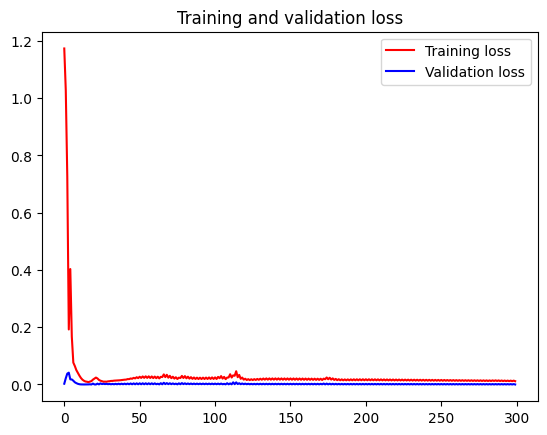

<Figure size 640x480 with 0 Axes>

In [215]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [216]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [217]:
r2_score(Y_test,Y_pred)

0.5063614622194796

In [218]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  0.031169139308775417
-------------------------------------------------------------------------------------
Mean Square Error:  0.00113175836121561


6. **Monero**

In [219]:
print('Null Values:', monero.isnull().values.sum())

Null Values: 0


In [220]:
print('NA values:', monero.isnull().values.any())

NA values: False


In [221]:
figure = px.line(monero, x=monero.Date, y=monero.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Monero Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [222]:
monero.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [223]:
monero

,Open,High,Low,Close
0,78.579536,82.777321,74.596100,82.526733
1,82.517708,83.517471,78.328087,82.498695
2,82.556580,83.696442,81.043579,81.988892
3,81.997993,88.069748,81.671745,88.024773
4,88.070236,90.658318,84.779030,90.153481
...,...,...,...,...
1457,155.987030,157.886246,155.865845,156.793015
1458,156.789063,158.039993,156.575363,157.723282
1459,157.750397,159.563324,157.101898,158.227722
1460,158.229507,159.780930,158.003448,158.308792


6.1 **Monero Close Price Prediction using Polynominal Regression**

In [224]:
close=monero["Close"]
monero_copy=monero.copy()
monero_copy.drop(["Close"], axis=1, inplace=True)

In [225]:
close=close.values.reshape(-1, 1)
close

array([[ 82.526733],
       [ 82.498695],
       [ 81.988892],
       ...,
       [158.227722],
       [158.308792],
       [157.900925]])

In [226]:
monero_copy

,Open,High,Low
0,78.579536,82.777321,74.596100
1,82.517708,83.517471,78.328087
2,82.556580,83.696442,81.043579
3,81.997993,88.069748,81.671745
4,88.070236,90.658318,84.779030
...,...,...,...
1457,155.987030,157.886246,155.865845
1458,156.789063,158.039993,156.575363
1459,157.750397,159.563324,157.101898
1460,158.229507,159.780930,158.003448


In [227]:
monero_copy=scaler.fit_transform(monero_copy)
close=scaler.fit_transform(close)

In [228]:
X_train, X_test, Y_train, Y_test = train_test_split(monero_copy, close, test_size=0.2)

In [229]:
polynominal_regression = PolynomialFeatures(5)

In [230]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [231]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)


Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9983317306758165
R2 score for the testing dataset:  0.9880783027768875
  
MSE for the training dataset:  0.0016841544501357425
MSE for the testing dataset:  0.011378309648563605


6.2 **Monero Close Price Prediction using XGBoost**

In [232]:
monero

,Open,High,Low,Close
0,78.579536,82.777321,74.596100,82.526733
1,82.517708,83.517471,78.328087,82.498695
2,82.556580,83.696442,81.043579,81.988892
3,81.997993,88.069748,81.671745,88.024773
4,88.070236,90.658318,84.779030,90.153481
...,...,...,...,...
1457,155.987030,157.886246,155.865845,156.793015
1458,156.789063,158.039993,156.575363,157.723282
1459,157.750397,159.563324,157.101898,158.227722
1460,158.229507,159.780930,158.003448,158.308792


In [233]:
close=monero["Close"]
monero_copy=monero.copy()
monero_copy.drop(["Close"], axis=1, inplace=True)

In [234]:
monero_copy

,Open,High,Low
0,78.579536,82.777321,74.596100
1,82.517708,83.517471,78.328087
2,82.556580,83.696442,81.043579
3,81.997993,88.069748,81.671745
4,88.070236,90.658318,84.779030
...,...,...,...
1457,155.987030,157.886246,155.865845
1458,156.789063,158.039993,156.575363
1459,157.750397,159.563324,157.101898
1460,158.229507,159.780930,158.003448


In [235]:
X_train, X_test, Y_train, Y_test = train_test_split(monero_copy, close, test_size=0.20)

In [236]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [237]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

[09:33:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [238]:
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

Mean Absolute Error:  56.09229877034617
Mean Squared Error:  4016.201969738967
Root Mean Squared Error:  63.373511578095204


6.3 **Monero Close Price Prediction using LSTM**

In [239]:
monero

,Open,High,Low,Close
0,78.579536,82.777321,74.596100,82.526733
1,82.517708,83.517471,78.328087,82.498695
2,82.556580,83.696442,81.043579,81.988892
3,81.997993,88.069748,81.671745,88.024773
4,88.070236,90.658318,84.779030,90.153481
...,...,...,...,...
1457,155.987030,157.886246,155.865845,156.793015
1458,156.789063,158.039993,156.575363,157.723282
1459,157.750397,159.563324,157.101898,158.227722
1460,158.229507,159.780930,158.003448,158.308792


In [240]:
matrix = []
for i in range(len(monero['Close'])-1, 2, -1):

  day3=monero['Close'][i-3]
  day2=monero['Close'][i-2]
  day1=monero['Close'][i-1]
  matrix.append([monero['Close'][i], day1, day2, day3])

matrix

[[157.900925, 158.308792, 158.227722, 157.723282],
 [158.308792, 158.227722, 157.723282, 156.793015],
 [158.227722, 157.723282, 156.793015, 155.993378],
 [157.723282, 156.793015, 155.993378, 157.20314],
 [156.793015, 155.993378, 157.20314, 158.887863],
 [155.993378, 157.20314, 158.887863, 158.286865],
 [157.20314, 158.887863, 158.286865, 159.627823],
 [158.887863, 158.286865, 159.627823, 159.509796],
 [158.286865, 159.627823, 159.509796, 158.409103],
 [159.627823, 159.509796, 158.409103, 160.358566],
 [159.509796, 158.409103, 160.358566, 159.848999],
 [158.409103, 160.358566, 159.848999, 160.265045],
 [160.358566, 159.848999, 160.265045, 161.257126],
 [159.848999, 160.265045, 161.257126, 160.262451],
 [160.265045, 161.257126, 160.262451, 163.204437],
 [161.257126, 160.262451, 163.204437, 163.307877],
 [160.262451, 163.204437, 163.307877, 162.147064],
 [163.204437, 163.307877, 162.147064, 163.005035],
 [163.307877, 162.147064, 163.005035, 162.752228],
 [162.147064, 163.005035, 162.75222

In [241]:
monero_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
monero_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,157.900925,158.308792,158.227722,157.723282
1,158.308792,158.227722,157.723282,156.793015
2,158.227722,157.723282,156.793015,155.993378
3,157.723282,156.793015,155.993378,157.203140
4,156.793015,155.993378,157.203140,158.887863
...,...,...,...,...
1454,82.253517,80.565483,85.741058,90.153481
1455,80.565483,85.741058,90.153481,88.024773
1456,85.741058,90.153481,88.024773,81.988892
1457,90.153481,88.024773,81.988892,82.498695


In [242]:
test = monero_price_prediction[:int(len(monero_price_prediction)*0.2)]
train = monero_price_prediction[int(len(monero_price_prediction)*0.2):]

In [243]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [244]:
X_train

,One day ago,Two days ago,Three days ago
291,145.764969,146.840759,144.185669
292,146.840759,144.185669,143.225418
293,144.185669,143.225418,144.488083
294,143.225418,144.488083,142.801865
295,144.488083,142.801865,140.729477
...,...,...,...
1454,80.565483,85.741058,90.153481
1455,85.741058,90.153481,88.024773
1456,90.153481,88.024773,81.988892
1457,88.024773,81.988892,82.498695


In [245]:
Y_train

291     146.804565
292     145.764969
293     146.840759
294     144.185669
295     143.225418
           ...    
1454     82.253517
1455     80.565483
1456     85.741058
1457     90.153481
1458     88.024773
Name: Close, Length: 1168, dtype: float64

In [246]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
X_train.shape

(1168, 3)

In [248]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [249]:
X_train.shape

(1168, 1, 3)

In [250]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [251]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_11 (LSTM)              (None, 64)                42240     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [252]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [253]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 4s 22ms/step - loss: 38034.2656 - mean_absolute_error: 178.2152 - val_loss: 3951.6885 - val_mean_absolute_error: 61.5251
Epoch 2/300
30/30 [==============================] - 0s 10ms/step - loss: 37962.4336 - mean_absolute_error: 178.0106 - val_loss: 3895.6340 - val_mean_absolute_error: 61.0572
Epoch 3/300
30/30 [==============================] - 0s 10ms/step - loss: 37745.0391 - mean_absolute_error: 177.4160 - val_loss: 3715.4688 - val_mean_absolute_error: 59.5123
Epoch 4/300
30/30 [==============================] - 0s 10ms/step - loss: 37043.8203 - mean_absolute_error: 175.5544 - val_loss: 3154.8606 - val_mean_absolute_error: 54.3605
Epoch 5/300
30/30 [==============================] - 0s 11ms/step - loss: 35137.4805 - mean_absolute_error: 170.3228 - val_loss: 1904.8818 - val_mean_absolute_error: 40.3591
Epoch 6/300
30/30 [==============================] - 0s 11ms/step - loss: 31178.8027 - mean_absolute_error: 158.5958 - val_loss: 6

<Figure size 640x480 with 0 Axes>

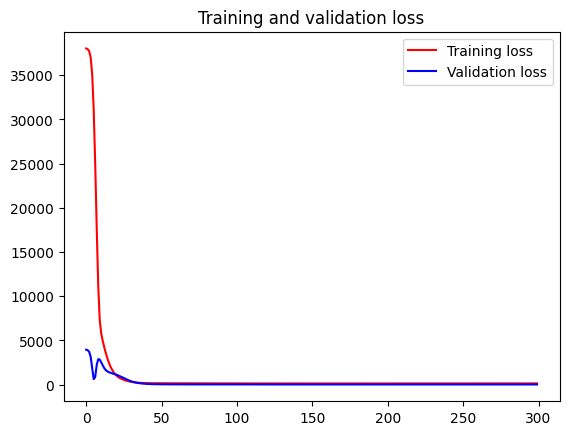

<Figure size 640x480 with 0 Axes>

In [254]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [255]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [256]:
r2_score(Y_test,Y_pred)

0.8658712305097749

In [257]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  2.8850127080799637
-------------------------------------------------------------------------------------
Mean Square Error:  16.67813907056782


7. **Dash**

In [258]:
print('Null Values:', dash.isnull().values.sum())

Null Values: 0


In [259]:
print('NA values:', dash.isnull().values.any())

NA values: False


In [260]:
figure = px.line(dash, x=dash.Date, y=dash.Close,labels={'Close':'Close Stock'})
figure.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
figure.update_layout(title_text='Dash Close Price in the last 4 years 2019-2023', title_x=0.5, plot_bgcolor='white', font_size=15, font_color='black')
figure.update_xaxes(showgrid=False)
figure.update_yaxes(showgrid=False)
figure.show()

In [261]:
dash.drop(columns=['Date', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [262]:
dash

,Open,High,Low,Close
0,95.618362,96.924858,92.351349,95.183662
1,95.220963,95.536400,92.065369,94.238167
2,94.228180,94.400208,91.307892,92.736610
3,92.749168,96.626320,91.761375,95.108253
4,95.133324,98.113785,94.272614,98.113785
...,...,...,...,...
1457,32.348362,32.822819,32.211700,32.504082
1458,32.503788,32.552181,32.132256,32.280045
1459,32.281303,32.377693,31.891104,32.015472
1460,32.014061,32.294449,31.827599,31.960718


7.1 **Dash Close Price Prediction using Polynominal Regression**

In [263]:
close=dash["Close"]
dash_copy=dash.copy()
dash_copy.drop(["Close"], axis=1, inplace=True)

In [264]:
close=close.values.reshape(-1, 1)
close

array([[95.183662],
       [94.238167],
       [92.73661 ],
       ...,
       [32.015472],
       [31.960718],
       [31.349024]])

In [265]:
dash_copy

,Open,High,Low
0,95.618362,96.924858,92.351349
1,95.220963,95.536400,92.065369
2,94.228180,94.400208,91.307892
3,92.749168,96.626320,91.761375
4,95.133324,98.113785,94.272614
...,...,...,...
1457,32.348362,32.822819,32.211700
1458,32.503788,32.552181,32.132256
1459,32.281303,32.377693,31.891104
1460,32.014061,32.294449,31.827599


In [266]:
dash_copy=scaler.fit_transform(dash_copy)
close=scaler.fit_transform(close)

In [267]:
X_train, X_test, Y_train, Y_test = train_test_split(dash_copy, close, test_size=0.2)

In [268]:
polynominal_regression = PolynomialFeatures(5)

In [269]:
X_train = polynominal_regression.fit_transform(X_train)
X_test = polynominal_regression.fit_transform(X_test)

In [270]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, Y_train)

LinearRegression()

In [271]:
Y_pred = linear_regression.predict(X_test)

train_r2 = r2_score(Y_train, linear_regression.predict(X_train))
train_mse = mean_squared_error(Y_train, linear_regression.predict(X_train))

test_r2 = r2_score(Y_test, Y_pred)
test_mse = mean_squared_error(Y_test, Y_pred)

print("R2 score for the training dataset: ", train_r2)
print("R2 score for the testing dataset: ", test_r2)

print("  ")
print("MSE for the training dataset: ", train_mse)
print("MSE for the testing dataset: ", test_mse)

R2 score for the training dataset:  0.9987609408160845
R2 score for the testing dataset:  0.7265695581106524
  
MSE for the training dataset:  0.0012258109515850448
MSE for the testing dataset:  0.28481778541100095


7.2 **Dash Close Price Prediction using XGBoost**

In [272]:
dash

,Open,High,Low,Close
0,95.618362,96.924858,92.351349,95.183662
1,95.220963,95.536400,92.065369,94.238167
2,94.228180,94.400208,91.307892,92.736610
3,92.749168,96.626320,91.761375,95.108253
4,95.133324,98.113785,94.272614,98.113785
...,...,...,...,...
1457,32.348362,32.822819,32.211700,32.504082
1458,32.503788,32.552181,32.132256,32.280045
1459,32.281303,32.377693,31.891104,32.015472
1460,32.014061,32.294449,31.827599,31.960718


In [273]:
close=dash["Close"]
dash_copy=dash.copy()
dash_copy.drop(["Close"], axis=1, inplace=True)

In [274]:
dash_copy

,Open,High,Low
0,95.618362,96.924858,92.351349
1,95.220963,95.536400,92.065369
2,94.228180,94.400208,91.307892
3,92.749168,96.626320,91.761375
4,95.133324,98.113785,94.272614
...,...,...,...
1457,32.348362,32.822819,32.211700
1458,32.503788,32.552181,32.132256
1459,32.281303,32.377693,31.891104
1460,32.014061,32.294449,31.827599


In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(dash_copy, close, test_size=0.20)

In [276]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [277]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

[09:35:26] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [278]:
print("Mean Absolute Error: ", mean_absolute_error(Y_pred, Y_test))
print("Mean Squared Error: ", mean_squared_error(Y_pred, Y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(Y_pred, Y_test)))

Mean Absolute Error:  34.21988747290789
Mean Squared Error:  1732.3873653336118
Root Mean Squared Error:  41.62195773066918


7.3 **Dash Close Price Prediction using LSTM**

In [279]:
dash

,Open,High,Low,Close
0,95.618362,96.924858,92.351349,95.183662
1,95.220963,95.536400,92.065369,94.238167
2,94.228180,94.400208,91.307892,92.736610
3,92.749168,96.626320,91.761375,95.108253
4,95.133324,98.113785,94.272614,98.113785
...,...,...,...,...
1457,32.348362,32.822819,32.211700,32.504082
1458,32.503788,32.552181,32.132256,32.280045
1459,32.281303,32.377693,31.891104,32.015472
1460,32.014061,32.294449,31.827599,31.960718


In [280]:
matrix = []
for i in range(len(dash['Close'])-1, 2, -1):

  day3=dash['Close'][i-3]
  day2=dash['Close'][i-2]
  day1=dash['Close'][i-1]
  matrix.append([dash['Close'][i], day1, day2, day3])

matrix

[[31.349024, 31.960718, 32.015472, 32.280045],
 [31.960718, 32.015472, 32.280045, 32.504082],
 [32.015472, 32.280045, 32.504082, 32.347794],
 [32.280045, 32.504082, 32.347794, 32.844437],
 [32.504082, 32.347794, 32.844437, 32.925213],
 [32.347794, 32.844437, 32.925213, 32.456139],
 [32.844437, 32.925213, 32.456139, 32.446529],
 [32.925213, 32.456139, 32.446529, 30.920326],
 [32.456139, 32.446529, 30.920326, 30.821457],
 [32.446529, 30.920326, 30.821457, 31.361593],
 [30.920326, 30.821457, 31.361593, 31.932131],
 [30.821457, 31.361593, 31.932131, 31.766348],
 [31.361593, 31.932131, 31.766348, 31.670227],
 [31.932131, 31.766348, 31.670227, 32.133888],
 [31.766348, 31.670227, 32.133888, 32.573311],
 [31.670227, 32.133888, 32.573311, 32.288349],
 [32.133888, 32.573311, 32.288349, 31.815023],
 [32.573311, 32.288349, 31.815023, 31.636168],
 [32.288349, 31.815023, 31.636168, 31.43392],
 [31.815023, 31.636168, 31.43392, 32.028088],
 [31.636168, 31.43392, 32.028088, 33.671501],
 [31.43392, 32.0

In [281]:
dash_price_prediction = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago'])
dash_price_prediction

,Close,One day ago,Two days ago,Three days ago
0,31.349024,31.960718,32.015472,32.280045
1,31.960718,32.015472,32.280045,32.504082
2,32.015472,32.280045,32.504082,32.347794
3,32.280045,32.504082,32.347794,32.844437
4,32.504082,32.347794,32.844437,32.925213
...,...,...,...,...
1454,91.236702,90.225883,93.941948,98.113785
1455,90.225883,93.941948,98.113785,95.108253
1456,93.941948,98.113785,95.108253,92.736610
1457,98.113785,95.108253,92.736610,94.238167


In [282]:
test = dash_price_prediction[:int(len(dash_price_prediction)*0.2)]
train = dash_price_prediction[int(len(dash_price_prediction)*0.2):]

In [283]:
X_train = train.iloc[:,1:]
X_test = test.iloc[:,1:]

Y_train = train['Close']
Y_test = test['Close']

In [284]:
X_train

,One day ago,Two days ago,Three days ago
291,41.409679,42.092045,41.409409
292,42.092045,41.409409,40.126072
293,41.409409,40.126072,41.687363
294,40.126072,41.687363,40.825829
295,41.687363,40.825829,40.620937
...,...,...,...
1454,90.225883,93.941948,98.113785
1455,93.941948,98.113785,95.108253
1456,98.113785,95.108253,92.736610
1457,95.108253,92.736610,94.238167


In [285]:
Y_train

291     42.458885
292     41.409679
293     42.092045
294     41.409409
295     40.126072
          ...    
1454    91.236702
1455    90.225883
1456    93.941948
1457    98.113785
1458    95.108253
Name: Close, Length: 1168, dtype: float64

In [286]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [287]:
X_train.shape

(1168, 3)

In [288]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [289]:
X_train.shape

(1168, 1, 3)

In [290]:
model = Sequential()

model.add(LSTM(100, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [291]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 100)            41600     
                                                                 
 lstm_13 (LSTM)              (None, 64)                42240     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,905
Trainable params: 83,905
Non-trainable params: 0
_________________________________________________________________


In [292]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [293]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=300, batch_size=32)

Epoch 1/300
30/30 [==============================] - 5s 22ms/step - loss: 20350.4629 - mean_absolute_error: 122.5410 - val_loss: 6397.6860 - val_mean_absolute_error: 76.5189
Epoch 2/300
30/30 [==============================] - 0s 9ms/step - loss: 20303.6152 - mean_absolute_error: 122.3527 - val_loss: 6348.6890 - val_mean_absolute_error: 76.1644
Epoch 3/300
30/30 [==============================] - 0s 10ms/step - loss: 20167.9277 - mean_absolute_error: 121.7865 - val_loss: 6182.3521 - val_mean_absolute_error: 74.8940
Epoch 4/300
30/30 [==============================] - 0s 10ms/step - loss: 19724.1758 - mean_absolute_error: 119.8428 - val_loss: 5629.9033 - val_mean_absolute_error: 70.2778
Epoch 5/300
30/30 [==============================] - 0s 10ms/step - loss: 18435.7871 - mean_absolute_error: 113.6124 - val_loss: 4352.3232 - val_mean_absolute_error: 57.1310
Epoch 6/300
30/30 [==============================] - 0s 9ms/step - loss: 15965.3330 - mean_absolute_error: 99.8462 - val_loss: 3090

<Figure size 640x480 with 0 Axes>

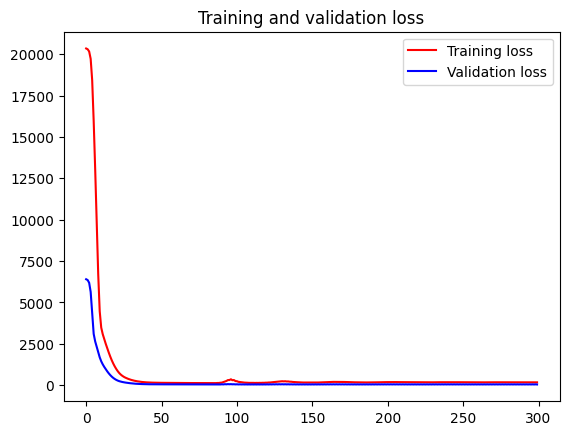

<Figure size 640x480 with 0 Axes>

In [294]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [295]:
Y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [296]:
r2_score(Y_test,Y_pred)

0.9256930110031989

In [297]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test,Y_pred))
print("-------------------------------------------------------------------------------------")
print("Mean Square Error: ", mean_squared_error(Y_test, Y_pred))

Mean Absolute Error:  2.393312949641591
-------------------------------------------------------------------------------------
Mean Square Error:  9.740620052177658


Ви благодарам на вниманието

---------------------------

**КРАЈ**